# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [27]:
import main
import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

**Zadanie Domowe**   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

3. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) 


In [28]:
import main
A1, b1 = main.random_matrix_Ab(10)
A2, b2 = main.random_matrix_Ab(20)
A3, b3 = main.random_matrix_Ab(50)
A4, b4 = main.random_matrix_Ab(100)
A5, b5 = main.random_matrix_Ab(1000)


***Zadanie 1***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*.

In [29]:
#1 
x1 = np.linalg.solve(A1, b1)
x2 = np.linalg.solve(A2, b2)
x3 = np.linalg.solve(A3, b3)
x4 = np.linalg.solve(A4, b4)
x5 = np.linalg.solve(A5, b5)

***Wnioski:***

W pierwszym podpunkcie zadania miałam okazję wykorzystać zaimplementowaną wcześniej funkcję *random_matrix_Ab*. Skorzystałam z funkcji *solve*, aby wskazać rozwiązania równania *Ax = b* dla każdego rozmiaru macierzy *m*.

2. Sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

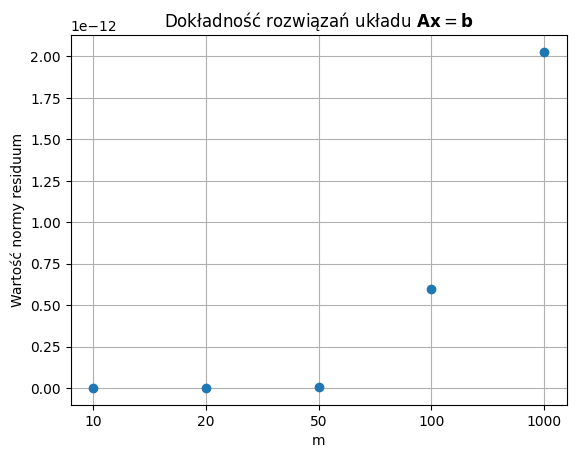

In [30]:
#2 
matrices = [A1, A2, A3, A4, A5]
frees = [b1, b2, b3, b4, b5]
solutions = [x1, x2, x3, x4, x5]
residuum = []
for idx in range(5):
    residuum.append(main.residual_norm(matrices[idx], solutions[idx], frees[idx]))    
plt.plot(['10', '20', '50', '100', '1000'], residuum, 'o')
plt.title('Dokładność rozwiązań układu $\mathbf{Ax}=\mathbf{b}$')
plt.xlabel('m')
plt.ylabel('Wartość normy residuum')
plt.grid()

***Wnioski:***

W tej części wykorzystałam drugą z zaimplementowanych wcześniej funkcji - *residual_norm*. Posłużyła mi ona do sprawdzenia, jak dokładne są otrzymane rozwiązania równania. Wyniki przedstawiłam na wykresie. Dzięki kilku próbom uruchomienia programu, zauważyłam, że wyniki są tym dokładniejsze, im mniejszy jest wymiar macierzy. 



3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*.

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

Wymiary macierzy mają wpływ na jakość otrzymanych wyników. Im większe *m*, tym większa jest niedokładność obliczeń.


5. Zbadać czas wykonania obliczeń przy pomocy funkcji *timeint*


SIZE:  100
Timing: 
55 µs ± 10.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
SIZE:  400
Timing: 
67.1 µs ± 8.12 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
SIZE:  2500
Timing: 
255 µs ± 73.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
SIZE:  10000
Timing: 
1.92 ms ± 147 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
SIZE:  1000000
Timing: 
473 ms ± 5.73 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


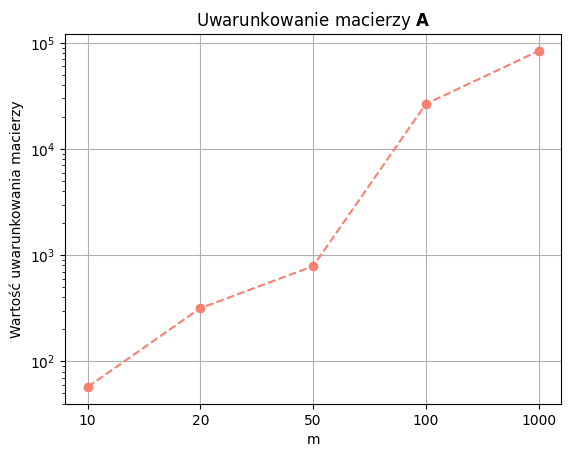

In [31]:

#3 i 5
plt.figure()
conditions = []
for matrix in matrices:
    conditions.append(np.linalg.cond(matrix))
    print('SIZE: ', matrix.size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o np.linalg.cond(matrix)
    saved_timing.average   # średni czas próby
    saved_timing.stdev  
plt.plot(['10', '20', '50', '100', '1000'], conditions, 'o--', color= 'salmon')
plt.title('Uwarunkowanie macierzy $\mathbf{A}$')
plt.xlabel('m')
plt.ylabel('Wartość uwarunkowania macierzy')
plt.semilogy()
plt.grid()


***Wnioski:***

Dzięki realizacji pudpunktu trzeciego, mogłam zauważyć, że uwarunkowanie macierzy rośnie wraz ze wzrostem jej wymiarów. Wiąże się to z tym, że dla większych rozmiarów, otrzymywane wyniki są mniej dokładne. W ostatnim podpunkcie, przekonałam się, że zdecydowanie wzrasta również czas potrzebny na odpowiednie obliczenia. Dla porównania wartości *m*: równych 10 oraz 1000, w przypadku większej wartości potrzeba aż 10000 razy więcej czasu.

***Zadanie 2***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [32]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:


- wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej, np:

In [43]:
S1 = np.logspace(100, 1, num=3)
print(main.log_sing_value(5, 1, 100))

[1.00000000e+100 1.77827941e+075 3.16227766e+050 5.62341325e+025
 1.00000000e+001]


- wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych, np.:

In [40]:
S2 = np.logspace(100, 1, num=3)
S2[0] = S2[0]+100
print(main.order_sing_value(5, 2, 'gre'))


[952.94922572   7.48634462   5.83622398   3.76970116   1.36480799]


- wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 

In [41]:
S3 = np.logspace(100, 1, num=3)
S3[-1] = S3[0]-100
print(main.order_sing_value(5, 2, 'low'))

[8.93367274 6.55901284 5.19877811 3.98018936 0.03630098]




W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*     
    - *order\_sing\_value* zgodnie z opisem w main.py


***Wnioski:***

W tej części zadania zaimplementowałam funkcje, które posłużyły mi w kolejnych punktach do tworzenia wektorów wartości singularnych o wskazanych charakterystykach.


2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak w przykładzie:
 

In [36]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])
U,S,V = nplin.svd(A)

A1 = np.dot(U * S1, V)
A2 = np.dot(U * S2, V)
A3 = np.dot(U * S3, V)
# print('Macierz pierwotna:')
# print(A)

# print('Macierz na podstawie wartości S1:')
# print(A1)

# print('Macierz na podstawie wartości S2:')
# print(A2)

# print('Macierz na podstawie wartości S3:')
# print(A3)


3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 


In [37]:
sings_log = []
sings_small = []
sings_big = []
sizes = [10, 20, 50, 100, 1000]
for size in sizes:
    sings_log.append(main.log_sing_value(size, 1, 100))
    sings_small.append(main.order_sing_value(size, site= 'low'))
    sings_big.append(main.order_sing_value(size, site= 'gre'))

matrices_log = []
for idx in range(5):
    matrices_log.append(main.create_matrix_from_A(matrices[idx], sings_log[idx]))


conditions_log = []
for idx in range(5):
    conditions_log.append(np.linalg.cond(matrices_log[idx]))

matrices_small = []
for idx in range(5):
    matrices_small.append(main.create_matrix_from_A(matrices[idx], sings_small[idx]))
conditions_small = []
for idx in range(5):
    conditions_small.append(np.linalg.cond(matrices_small[idx]))

matrices_big = []
for idx in range(5):
    matrices_big.append(main.create_matrix_from_A(matrices[idx], sings_big[idx]))
conditions_big = []
for idx in range(5):
    conditions_big.append(np.linalg.cond(matrices_big[idx]))

***Wnioski:***

Zaimplementowałam funkcję, która posłużyła mi do odtwarzania macierzy z zadania 1. z wykorzystaniem podmienionych wektorów wartości singularnych. Wektory o odpowiednich rozmiarach utworzyłam z wykorzystaniem funkcji *log_sing_value* oraz *order_sing_value*. Następnie, obliczyłam współczynniki uwarunkowania dla otrzymanych macierzy oraz residua rozwiązań. 


4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

Wyliczanie macierzy nie jest konieczne. Wystarczy znać największą oraz najmniejszą wartość singularną. Współczynnik uwarunkowania jest ich ilorazem. 


5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




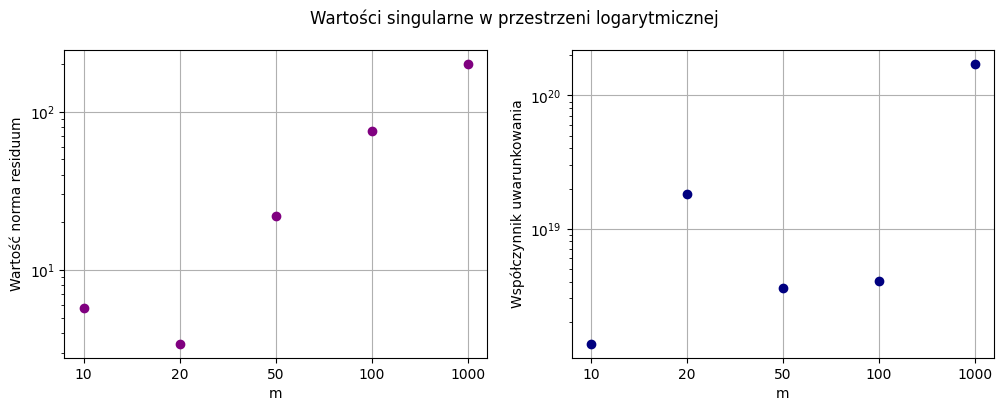

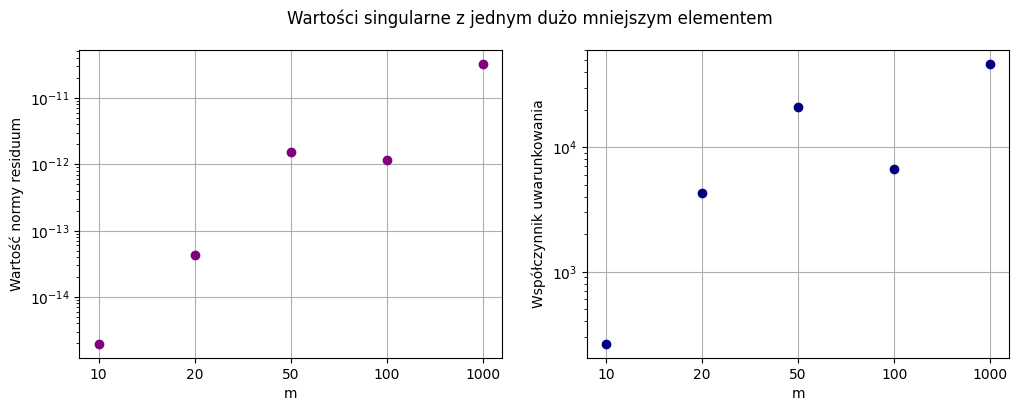

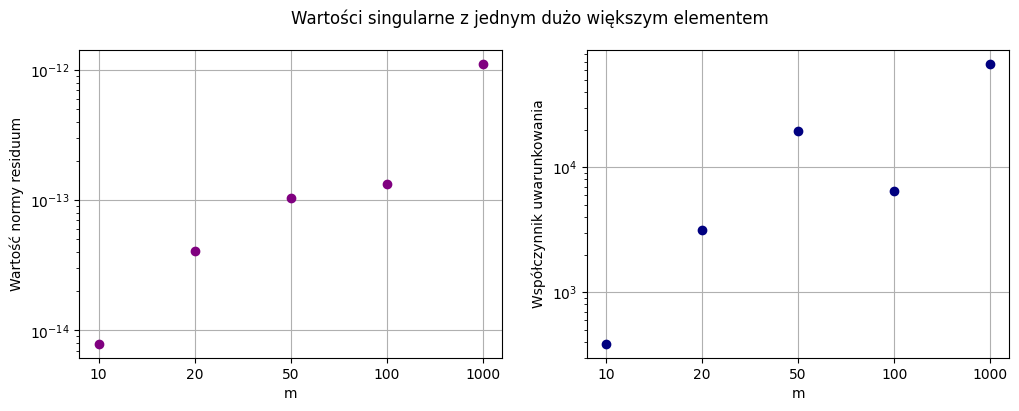

In [38]:
res_log = []
res_small = []
res_big = []
for idx, size in enumerate(sizes):
    res_log.append(main.residual_norm(matrices_log[idx], np.linalg.solve(matrices_log[idx], frees[idx]), frees[idx]))
    res_small.append(main.residual_norm(matrices_small[idx], np.linalg.solve(matrices_small[idx], frees[idx]), frees[idx]))
    res_big.append(main.residual_norm(matrices_big[idx], np.linalg.solve(matrices_big[idx], frees[idx]), frees[idx]))

plt.figure(figsize= (12, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(['10', '20', '50', '100', '1000'], res_log, 'o', color= 'purple')
ax1.set(xlabel= "m", ylabel= "Wartość norma residuum")
ax1.semilogy()
ax1.grid()
ax2 = plt.subplot(1, 2, 2)
ax2.plot(['10', '20', '50', '100', '1000'],  conditions_log, 'o', color= 'navy' )
ax2.set(xlabel= "m", ylabel= "Współczynnik uwarunkowania")
ax2.semilogy()
ax2.grid()
plt.suptitle("Wartości singularne w przestrzeni logarytmicznej")
plt.show()

plt.figure(figsize= (12, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(['10', '20', '50', '100', '1000'], res_small, 'o', color= 'purple')
ax1.set(xlabel= "m", ylabel= "Wartość normy residuum")
ax1.semilogy()
ax1.grid()
ax2 = plt.subplot(1, 2, 2)
ax2.plot(['10', '20', '50', '100', '1000'],  conditions_small, 'o' , color= 'navy' )
ax2.set(xlabel= "m", ylabel= "Współczynnik uwarunkowania")
ax2.semilogy()
ax2.grid()
plt.suptitle("Wartości singularne z jednym dużo mniejszym elementem")
plt.show()

plt.figure(figsize= (12, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(['10', '20', '50', '100', '1000'],  res_big, 'o', color= 'purple')
ax1.set(xlabel= "m", ylabel= "Wartość normy residuum")
ax1.semilogy()
ax1.grid()
ax2 = plt.subplot(1, 2, 2)
ax2.plot(['10', '20', '50', '100', '1000'], conditions_big, 'o', color= 'navy' )
ax2.set(xlabel= "m", ylabel= "Współczynnik uwarunkowania")
ax2.semilogy()
ax2.grid()
plt.suptitle("Wartości singularne z jednym dużo większym elementem")
plt.show()

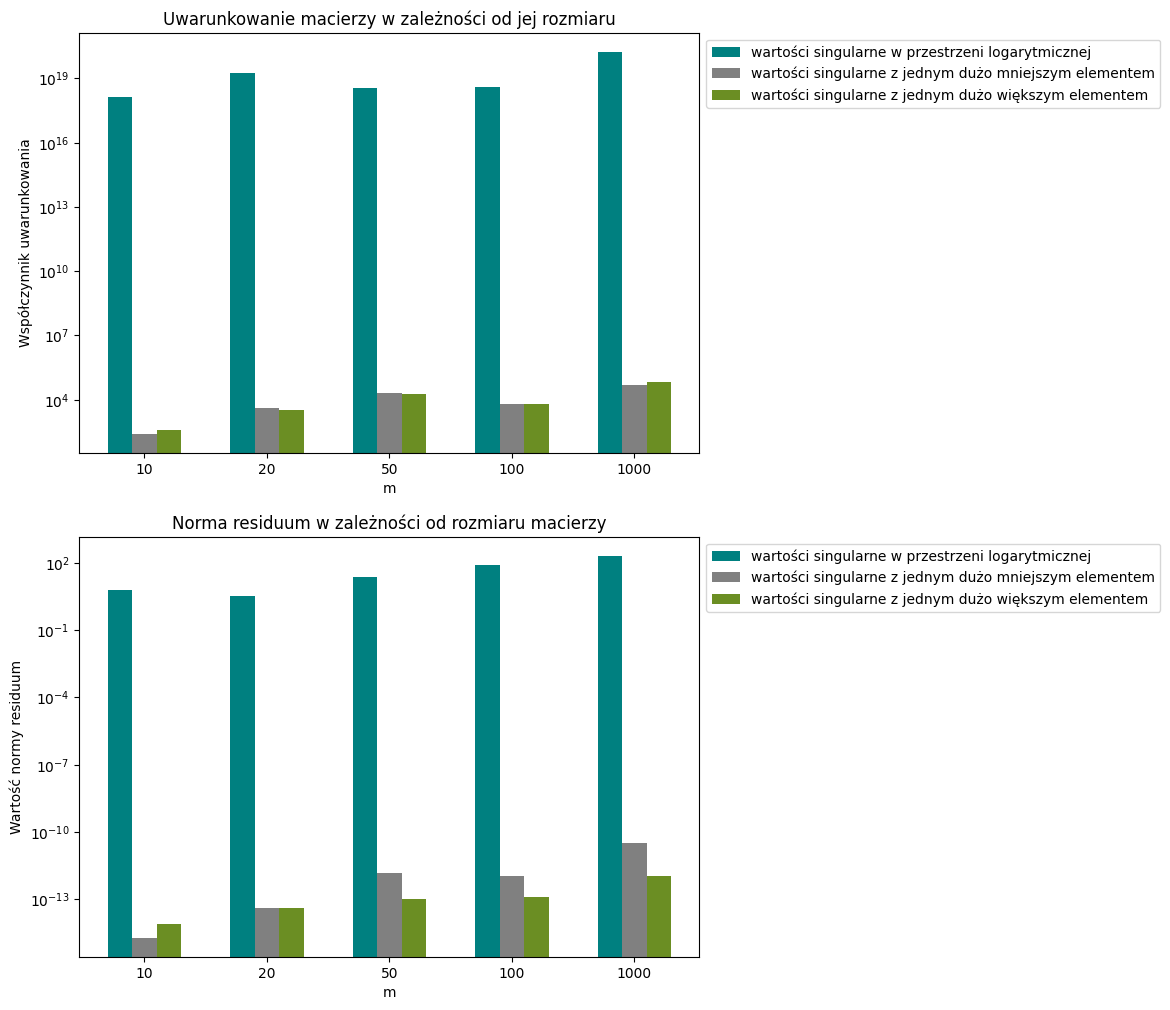

In [39]:

x = np.arange(len(sizes))
width = 0.2
fig, (ax1, ax2) = plt.subplots(2, 1, figsize= (8, 12))
ax1.bar(x-width, conditions_log, width, color= 'teal')
ax1.bar(x, conditions_small, width, color= 'grey')
ax1.bar(x+0.2, conditions_big, width, color= 'olivedrab')
ax1.set(xlabel= "m", ylabel= "Współczynnik uwarunkowania", title= 'Uwarunkowanie macierzy w zależności od jej rozmiaru')
ax1.set_xticks(x, sizes)
ax1.legend(["wartości singularne w przestrzeni logarytmicznej", "wartości singularne z jednym dużo mniejszym elementem",
 "wartości singularne z jednym dużo większym elementem"], loc= 'upper left', bbox_to_anchor=(1, 1))
ax1.semilogy()

ax2.bar(x-width, res_log, width, color= 'teal')
ax2.bar(x, res_small, width, color= 'grey')
ax2.bar(x+0.2, res_big, width, color= 'olivedrab')
ax2.set(xlabel= "m", ylabel= "Wartość normy residuum", title= 'Norma residuum w zależności od rozmiaru macierzy')
ax2.set_xticks(x, sizes)
ax2.legend(["wartości singularne w przestrzeni logarytmicznej", "wartości singularne z jednym dużo mniejszym elementem",
 "wartości singularne z jednym dużo większym elementem"], loc= 'upper left', bbox_to_anchor=(1, 1))
ax2.semilogy()
plt.show()


***Wnioski:***

W ostatnim podpunkcie zadania wyznaczyłam wykresy obrazujące zachowanie współczynnika uwarunkowania oraz normy residuum w zależności od rozmiaru macierzy. Dodatkowo, na jednym wykresie przedstawiłam porównanie tych wartości dla każdego *m* w zależności od specyfiki przyjętego wektora wartości singularnych. Na podstawie wykresów możemy wywnioskować, że zarówno norma residuum, jak i uwarunkowanie macierzy są największe dla dużych wymiarów. Mogłam zauważyć także, że wyniki są tym dokładniejsze, im mniejszy jest zakres wartości singularnych. Wektor z wartościami w przestrzeni logarytmicznej skutkował największymi błędami. Wartości singularne nie powinny różnić się od siebie o duże liczby.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)